# A closer look at the 32 column runs

As in notebook 1.0 we will check out the 32 column runs, comparing the network trained with 36 days and one year of data.

`001_32cols_engy_ess_3d_pnas` is a network trained with the first 3 days from each month of the first year = 36 days. The configuration is the same as in the PNAS paper.
`002_32cols_engy_ess_1y_pnas` is the same network but trained with an entire year of data.

In [2]:
import xarray as xr
from cbrain.model_diagnostics import *
from cbrain.utils import *
limit_mem()

## Offline validation of trained neural networks

First we want to see how well the networks perform offline on the validation dataset.

In [5]:
# LMU
MODEL_DIR = '/home/s/S.Rasp/repositories/CBRAIN-CAM/saved_models/'
PREPROC_DIR = '/local/S.Rasp/preprocessed_data/'

In [6]:
# Create a ModelDiagnostics object
norms = ('feature_means', 'max_rs', None, 'target_conv')

diag_3d = ModelDiagnostics(
    MODEL_DIR + '001_32cols_engy_ess_3d_pnas.h5',
    fpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_features.nc',
    tpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_targets.nc',
    npath=PREPROC_DIR + '32_col_engy_ess_3d_train_norm.nc',
    norms=norms,
)

In [8]:
diag_3d.compute_stats()

100%|██████████| 429/429 [00:08<00:00, 50.23it/s]
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [9]:
diag_1y = ModelDiagnostics(
    MODEL_DIR + '002_32cols_engy_ess_1y_pnas.h5',
    fpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_features.nc',
    tpath=PREPROC_DIR + '32_col_engy_ess_3d_valid_targets.nc',
    npath=PREPROC_DIR + '32_col_engy_ess_3d_train_norm.nc',
    norms=norms,
)

In [10]:
diag_1y.compute_stats()

100%|██████████| 429/429 [00:07<00:00, 55.16it/s]
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/log/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [11]:
diag_3d.mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-2.59226e-07,7.62447e-10,-4.52999e-07,-1.93773e-07,9.69937e-10,1.73256e-09,7.81657e-10,1.52444e-09,0.386423,1.73256e-09,-1.93773e-07,7.62447e-10,1.71837e-09,0.534065
PHQ,1.25964e-10,5.97418e-16,9.77456e-10,8.51492e-10,2.97658e-16,8.8766e-16,2.37644e-16,8.26081e-16,-47.0462,8.8766e-16,8.51492e-10,5.97418e-16,8.80542e-16,0.442628
FSNT,0.368462,433.92,226.755,226.386,154751,154664,82903.2,83054.7,-inf,154664,226.386,433.92,103413,0.995804
FSNS,0.309971,524.81,159.075,158.765,84701.2,84896.3,48186.7,48508.9,-inf,84896.3,158.765,524.81,59689.9,0.991208
FLNT,0.0225993,121.525,224.983,224.96,52258.1,52355.7,788.965,883.801,0.7684,52355.7,224.96,121.525,1748.6,0.930502
FLNS,-0.0181243,52.3975,49.6453,49.6634,3194.82,3238.66,466.384,503.43,0.832758,3238.66,49.6634,52.3975,772.205,0.932146
PRECT,-6.77476e-10,1.94328e-15,2.97253e-08,3.04028e-08,6.351e-15,8.51124e-15,4.1856e-15,6.17133e-15,0.469577,8.51124e-15,3.04028e-08,1.94328e-15,7.58691e-15,0.743864
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795745


In [12]:
diag_1y.mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-7.29432e-08,6.85512e-10,-2.66716e-07,-1.93773e-07,1.03888e-09,1.73256e-09,8.44837e-10,1.52444e-09,0.471343,1.73256e-09,-1.93773e-07,6.85512e-10,1.71837e-09,0.582294
PHQ,4.8604e-11,5.723e-16,9.00096e-10,8.51492e-10,3.16266e-16,8.8766e-16,2.56592e-16,8.26081e-16,-25.4494,8.8766e-16,8.51492e-10,5.723e-16,8.80542e-16,0.474101
FSNT,0.0213465,345.433,226.407,226.386,154310,154664,82698.7,83054.7,-inf,154664,226.386,345.433,103413,0.99666
FSNS,-0.00224893,427.495,158.763,158.765,84419.5,84896.3,48044,48508.9,-inf,84896.3,158.765,427.495,59689.9,0.992838
FLNT,-0.243302,82.4693,224.717,224.96,52178,52355.7,813.341,883.801,0.847155,52355.7,224.96,82.4693,1748.6,0.952837
FLNS,-0.122868,38.6355,49.5405,49.6634,3187,3238.66,469.581,503.43,0.875115,3238.66,49.6634,38.6355,772.205,0.949967
PRECT,-2.26992e-10,1.72686e-15,3.01758e-08,3.04028e-08,6.66501e-15,8.51124e-15,4.43413e-15,6.17133e-15,0.546326,8.51124e-15,3.04028e-08,1.72686e-15,7.58691e-15,0.772389
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817298


Looking at the `hor_r2` score, the 1y version has better scores for all variables. The differences for the "important" variables, `TPHYSTND` and `PHQ` are definitely significant. So from this analysis we "could" conclude that training with one year of data gives a "better" network. 

Looking at `pred_var` we can also see that the variance of the 1y network is larger. Make of that what you will.

To confirm this visually we can also look at some heating snapshots.

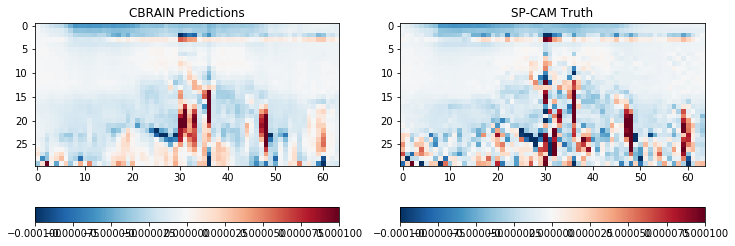

In [14]:
diag_3d.plot_double_yz(itime=0, ilon=3, var='TPHYSTND', vmin=-1e-4, vmax=1e-4, cmap='RdBu_r');

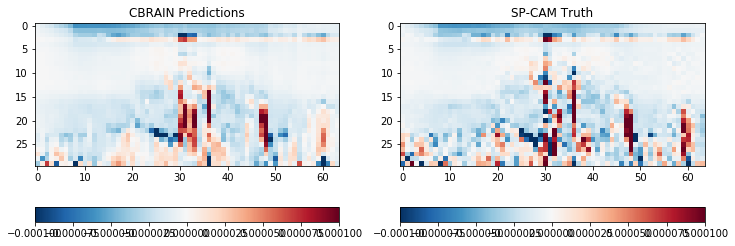

In [15]:
diag_1y.plot_double_yz(itime=0, ilon=3, var='TPHYSTND', vmin=-1e-4, vmax=1e-4, cmap='RdBu_r');

Check a slice for PHQ as well.

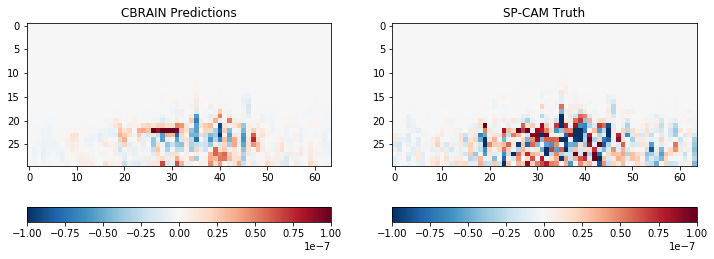

In [18]:
diag_3d.plot_double_yz(itime=0, ilon=20, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='RdBu_r');

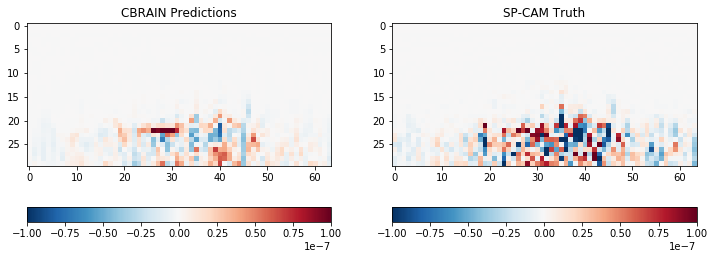

In [19]:
diag_1y.plot_double_yz(itime=0, ilon=20, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='RdBu_r');

## Analyzing the online runs.